In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Default_Fin.csv to Default_Fin.csv


In [7]:
data = pd.read_csv("Default_Fin.csv")
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [9]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [10]:
Employed = data["Employed"].value_counts() 
Employed

1    7056
0    2944
Name: Employed, dtype: int64

In [11]:
data["Employed"].nunique()

2

In [12]:
data["Defaulted?"].value_counts() 

0    9667
1     333
Name: Defaulted?, dtype: int64

In [13]:
data["Defaulted?"].nunique()

2

In [14]:
data["Index"].value_counts()

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: Index, Length: 10000, dtype: int64

In [15]:
data["Index"].nunique()

10000

In [16]:
input = data.drop(['Defaulted?','Index'], axis=1)
input

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


In [17]:
target = data["Defaulted?"]
target

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64

In [18]:
from sklearn.preprocessing import RobustScaler
input[['Bank Balance','Annual Salary']] = RobustScaler().fit_transform(input[['Bank Balance','Annual Salary']])

In [19]:
input

,Employed,Bank Balance,Annual Salary
0,1,-0.137465,0.436590
1,0,-0.009429,-0.999076
2,1,0.365067,-0.123981
3,1,-0.430027,0.051268
4,1,-0.055473,0.174069
...,...,...,...
9995,1,-0.163715,0.820738
9996,1,-0.095936,-0.662828
9997,1,0.031808,1.071938
9998,1,1.088818,0.094202


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input,target,test_size=0.2,random_state=42)

In [21]:
input_array = np.array(input)
target_array = np.array(target)
input_array.shape , target_array.shape

((10000, 3), (10000,))

In [22]:
x_train_array = np.array(x_train)
y_train_array = np.array(y_train)
x_test_array = np.array(x_test)
y_test_array = np.array(y_test)
x_train_array.shape , y_train_array.shape , x_test_array.shape , y_test_array.shape

((8000, 3), (8000,), (2000, 3), (2000,))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [24]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=[3]),
                    BatchNormalization(),
                    Dropout(0.3),

                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),

                    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [25]:
history = model.fit(
    x=x_train_array,
    y=y_train_array,
    batch_size=100,
    epochs=20,
    validation_data=(x_test_array,y_test_array)
)

Epoch 1/20
80/80 [==============================] - 2s 5ms/step - loss: 0.6026 - accuracy: 0.7163 - val_loss: 0.3122 - val_accuracy: 0.9655
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.9202 - val_loss: 0.1620 - val_accuracy: 0.9655
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9585 - val_loss: 0.1299 - val_accuracy: 0.9655
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9664 - val_loss: 0.1124 - val_accuracy: 0.9650
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.9665 - val_loss: 0.1182 - val_accuracy: 0.9650
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9670 - val_loss: 0.1147 - val_accuracy: 0.9660
Epoch 7/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9688 - val_loss: 0.0953 - val_accuracy: 0.9685
Epoch 8/20
80/80 [==

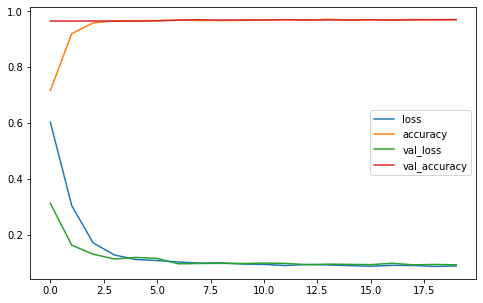

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

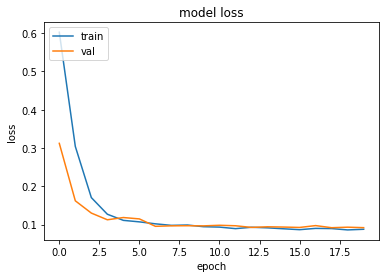

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,21):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train_array,y_train_array)
    
    print("Score for k =",k,"is,",KNN.score(x_test_array,y_test_array))
    

Score for k = 2 is, 0.963
Score for k = 3 is, 0.963
Score for k = 4 is, 0.9675
Score for k = 5 is, 0.965
Score for k = 6 is, 0.968
Score for k = 7 is, 0.967
Score for k = 8 is, 0.9685
Score for k = 9 is, 0.97
Score for k = 10 is, 0.9685
Score for k = 11 is, 0.968
Score for k = 12 is, 0.968
Score for k = 13 is, 0.9685
Score for k = 14 is, 0.9675
Score for k = 15 is, 0.9675
Score for k = 16 is, 0.9685
Score for k = 17 is, 0.9695
Score for k = 18 is, 0.9685
Score for k = 19 is, 0.9695
Score for k = 20 is, 0.9695


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 42, learning_rate = 0.05, max_depth=5)
gbrt.fit(x_train_array, y_train_array)

gbrt.score(x_test_array, y_test_array)


0.9675

In [30]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=4000)
LR.fit(x_train_array,y_train_array)
print(LR.score(x_test_array,y_test_array))

0.97


In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(x_train_array,y_train_array)
rfc.score(x_test_array,y_test_array)

0.9645